In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [1]:
import pandas as pd
import daal4py.sklearn
daal4py.sklearn.patch_sklearn()
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import time
time_start = time.time()
#clf = lm.Ridge()

# Load data from CSV file
df = pd.read_csv('Book1.csv')
df = pd.read_csv('Book1.csv', encoding= 'unicode_escape')

df['latitude'] = df['latitude'].apply(lambda x: x.replace("'", '').strip()[:-1])
df['latitude'] = df['latitude'].apply(lambda x: x.replace('"', '').strip()[:-1])
df['latitude'] = df['latitude'].astype(float)

df['longitude'] = df['longitude'].apply(lambda x: x.replace("'", '').strip()[:-1])
df['longitude'] = df['longitude'].apply(lambda x: x.replace('"', '').strip()[:-1])
df['longitude'] = df['longitude'].astype(float)

# Split data into input features and output targets
X = df[['latitude', 'longitude']]
y_str = df['soil']
y_num = df['temperature']

# Save the updated DataFrame back to a CSV file
df.to_csv('updated_filename.csv', index=False)

# Split data into training and testing sets
X_train, X_test, y_soil_train, y_soil_test, y_num_train, y_num_test = train_test_split(X, y_str, y_num, test_size=0.2, random_state=42)

# Train decision tree regressor to predict continuous value
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_num_train)

# Train decision tree classifier to predict string value
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_soil_train)
# Evaluate performance on test data
num_predictions = regressor.predict(X_test)
str_predictions = classifier.predict(X_test)


# Print performance metrics for continuous value prediction
num_score = regressor.score(X_test, y_num_test)
print('R-squared score for numeric output: ', num_score)

# Print performance metrics for string value prediction
str_score = classifier.score(X_test, y_soil_test)
print('Accuracy score for string output: ', str_score)

# Predict numeric output using decision tree regressor
num_prediction = regressor.predict(X_test)


# Predict string output using decision tree classifier
str_prediction = classifier.predict(X_test)



time_daal = time.time()-time_start
time_start = time.time()        
print(time_daal)  



dispatcher.py:151: FutureWarning: 
Scikit-learn patching with daal4py is deprecated and will be removed in the future.
Use Intel(R) Extension for Scikit-learn* module instead (pip install scikit-learn-intelex).
To enable patching, please use one of the following options:
1) From the command line:
    python -m sklearnex <your_script>
2) From your script:
    from sklearnex import patch_sklearn
    patch_sklearn()
Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


R-squared score for numeric output:  -0.2491739371496089
Accuracy score for string output:  0.3333333333333333
0.5483694076538086


In [6]:
%store -r time_nodaal

no stored variable or alias time_nodaal


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

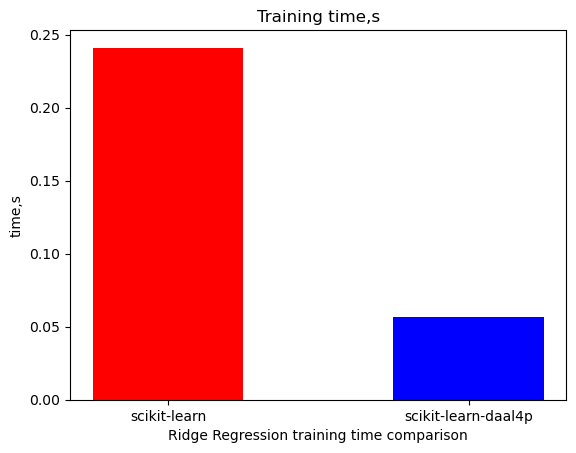

speedup: 4.2677498058285215


In [8]:
left = [1,2]
pred_times = [time_nodaal,time_daal ]
tick_label = ['scikit-learn', 'Intel oneDAL']
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['red', 'blue'])
plt.xlabel('Ridge Regression training time comparison'); plt.ylabel('time,s'); plt.title('Training time,s')
plt.show()
print("speedup:",time_nodaal/time_daal)